# Project data exploration II -
## plotting categorical plot and incorporating other data

---


We will continue to work with the dataset that your group is consider for the term project. In this notebook we will create some plot using the Seaborn module and the different categorical plots we practiced in class. Additionally, we will explore the idea of working with other datasets in addition to the one you originally selected to strengthen your argument.

Group name: Sugar Stats
Created by: Aaminah Mohammad (016466424), Steven Dinh (015208752), Akash Hebbar (015550873), Justine Legson (017099537)
Last updated: 10/19/2025

### Q1: How clean is your data?  
Do you have formatting concerns, null values, inconsistent data, etc... If so, explain what cleaning or reformating you have to do and how you plan to approach this cleaning steps.

There are no formatting concerns as the dataset is already clean and there is no null values or inconsistent data. We will be using the dataset as is and do not need any further action before working with it.

### Q2: Create a categorical plot
Come up with a unique question that can be answer using a categorical plot from the sns module

Is the proportion of people with Diabetes higher among individuals who report poor general health compared to those who report excellent or very good health?

/tmp/ipython-input-1667585898.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


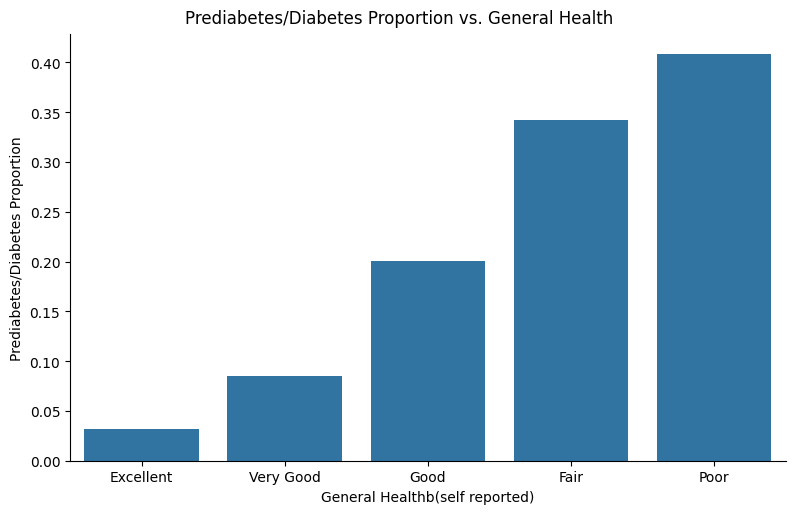

In [1]:
# Your code here . . .

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/aaminahmq/Datafiles/refs/heads/main/CS133%20group%20project%20files/diabetes_012_health_indicators_BRFSS2015.csv"
df = pd.read_csv(url)

df["Diabetes_binary"] = (df["Diabetes_012"] > 0).astype(int)


hmap = {1: "Excellent", 2: "Very Good", 3: "Good", 4: "Fair", 5: "Poor"}
df["GenHlth_Label"] = df["GenHlth"].map(hmap)
order = ["Excellent", "Very Good", "Good", "Fair", "Poor"]


g = sns.catplot(
    data=df,
    x="GenHlth_Label",
    y="Diabetes_binary",
    kind="bar",
    order=order,
    ci=None,
    height=5,
    aspect=1.6
)

g.set_axis_labels("General Healthb(self reported)", "Prediabetes/Diabetes Proportion")
g.fig.suptitle("Prediabetes/Diabetes Proportion vs. General Health", y=1.02)
plt.show()


### Q3: Come up with a another unique question. This question must use map() or apply()

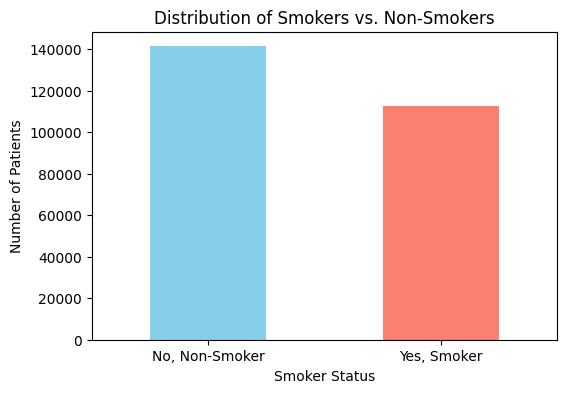

In [ ]:
# Your code here . . .

# question: what is the distribution of smokers and non-smokers among patients?

import matplotlib.pyplot as plt

# after mapping 0/1 to text
df["Smoker_Status"] = df["Smoker"].map({0: "No, Non-Smoker", 1: "Yes, Smoker"})

# count values
smoker_counts = df["Smoker_Status"].value_counts()

# plot bar chart
plt.figure(figsize=(6,4))
smoker_counts.plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Distribution of Smokers vs. Non-Smokers")
plt.xlabel("Smoker Status")
plt.ylabel("Number of Patients")
plt.xticks(rotation=0)
plt.show()


### Q4: Create an interactive plot
Create an interactive plot using plotly. Your plot can be a previously asked question or a new question, however explain how this interaction strengthen what you want to communicate with your audience.

In [6]:
# Your code here . . .


import pandas as pd
import plotly.express as px


df["Diabetes_binary"] = (df["Diabetes_012"] > 0).astype(int)


health_map = {1: "Excellent", 2: "Very Good", 3: "Good", 4: "Fair", 5: "Poor"}
df["GenHlth_Label"] = df["GenHlth"].map(health_map)
genhlth_order = ["Excellent", "Very Good", "Good", "Fair", "Poor"]


age_map = {
    1: "18–24",  2: "25–29",  3: "30–34",  4: "35–39",  5: "40–44",
    6: "45–49",  7: "50–54",  8: "55–59",  9: "60–64", 10: "65–69",
    11: "70–74", 12: "75–79", 13: "80+"
}
df["AgeBand"] = df["Age"].map(age_map)


agg = (
    df.groupby(["AgeBand", "GenHlth_Label"], as_index=False)
      .agg(prop=("Diabetes_binary", "mean"), n=("Diabetes_binary", "size"))
)

color_map = {
    "Excellent": "#4CAF50",
    "Very Good": "#2196F3",
    "Good": "#FFC107",
    "Fair": "#FF5722",
    "Poor": "#9C27B0"
}



fig = px.bar(
    agg,
    x="GenHlth_Label",
    y="prop",
    animation_frame="AgeBand",
    category_orders={"GenHlth_Label": genhlth_order},
    labels={"GenHlth_Label": "Self-Reported General Health", "prop": "Proportion with Prediabetes/Diabetes"},
    hover_data={"n": True, "prop": ":.2%"},
    text=agg["prop"].map(lambda v: f"{v:.0%}"),
    color="GenHlth_Label",
    color_discrete_map=color_map
)

fig.update_layout(
    title="Prediabetes/Diabetes Proportion vs Self-Reported General Health interactive by Age Group",
    yaxis_tickformat=".0%",
    yaxis_title="Proportion with Prediabetes/Diabetes",
    xaxis_title="Self-Reported General Health",
    bargap=0.15,
    transition={"duration": 400},
    legend_title_text="Health Levels"

)


fig.update_traces(textposition="outside", cliponaxis=False)

fig.show()


This interactive age slider is helpful because it allows us to compare the same relationship Diabetes/Prediabetes vs general health reports across different age ranges. This can help us see the trend of worse health higher diabetes prevalence and whether it is consistent or depenedent on age.

## Q5: Additional datasets and data processing
For the questions below you do not need to do the plotting if you have not found another complementary dataset. However, write the psuedocode of how you could go about answering the questions and sketches of what your visualization might be. Answer the following:

What additional datasets would you need to find or create to help strengthen your data?
How would you combine the dataset?
Do you need to reshape your data and how could you go about it?

In [ ]:
# Your code here . . .

'''
I would probably look for datasets related to the same topic from other
sources, e.g. NIH, Mayo Clinic, John Hopkins, FDA, in order to corroborate
our data and findings.

To combine data sets, I would have to check what kind of data the new data
set has to determine what function I could use.

concat() if the data has the same columns

merge() if the data has similar keys (like in SQL)

join() if the key is an index

append() if none of the data is similar and I just want to add more rows

To try and use concat, I could attempt to rename some columns
that have similar data to the same thing to be able to combine the two
into the same column, and getting rid of any null values.

For merge and join, I could check for datasets that have a similar key as
our current data set, in this case a single number denoting the data point.

Reshaping the data could involve converting from wide to long formatting.

Pseudocode:
import necessary libraries
load and clean datasets

check for missing values
identify keys to join sets on

reshape to similar formats

merge data sets

create variables derived from data

identify relationships

create plots (heatmaps, scatterplots)
'''

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
